<a href="https://colab.research.google.com/github/chilakahemanth55/salaryprediction/blob/main/salaryprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
# Load your dataset
df = pd.read_csv("/content/adult3.csv")


In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
df.shape

(48842, 15)

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
print(df.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
df.workclass.replace({'?':'Others'},inplace=True)
print(df['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-8-1271393163.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.workclass.replace({'?':'Others'},inplace=True)


In [ ]:
print(df['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
df.occupation.replace({'?':'Others'},inplace=True)
print(df['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-10-2918883568.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.occupation.replace({'?':'Others'},inplace=True)


In [ ]:
print(df.relationship.value_counts())

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


In [ ]:
print(df.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [ ]:
df.shape

(48842, 15)

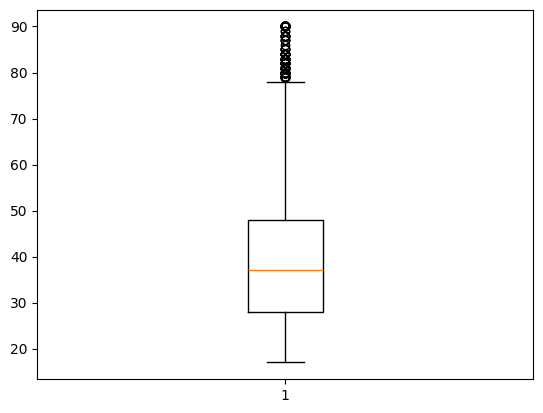

In [ ]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(df['age'])
plt.show()

In [ ]:
df=df[(df['age']<=75)&(df['age']>=17)]

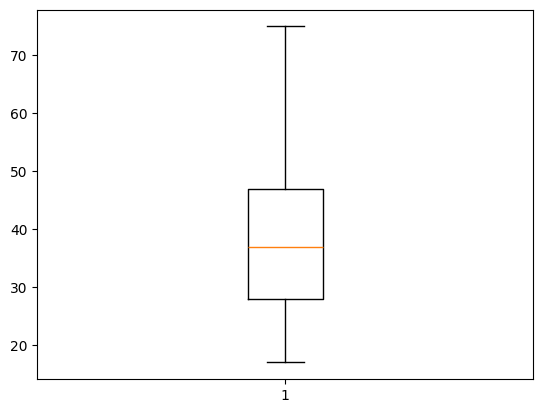

In [ ]:
plt.boxplot(df['age'])
plt.show()

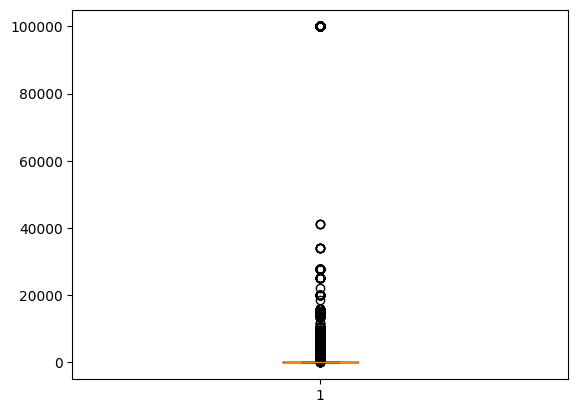

In [ ]:
plt.boxplot(df['capital-gain'])
plt.show()

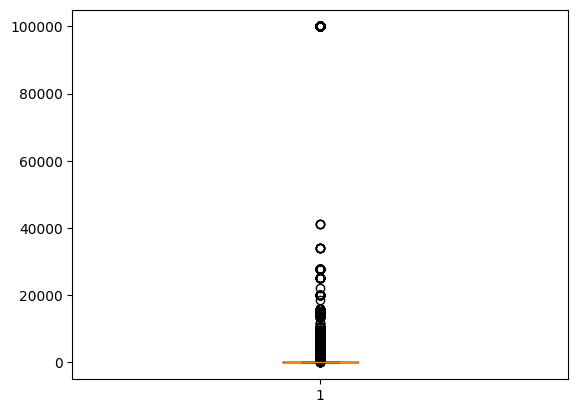

In [ ]:
plt.boxplot(df['capital-gain'])
plt.show()

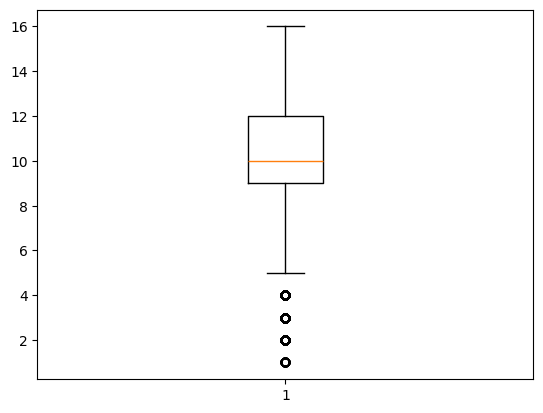

In [ ]:
plt.boxplot(df['educational-num'])
plt.show()

In [ ]:
df=df[(df['educational-num']<=16)&(df['educational-num']>=5)]

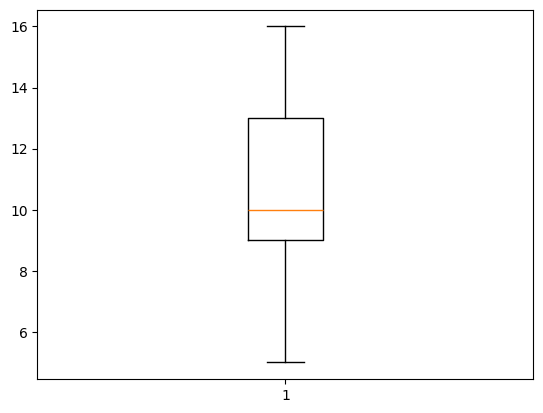

In [ ]:
plt.boxplot(df['educational-num'])
plt.show()

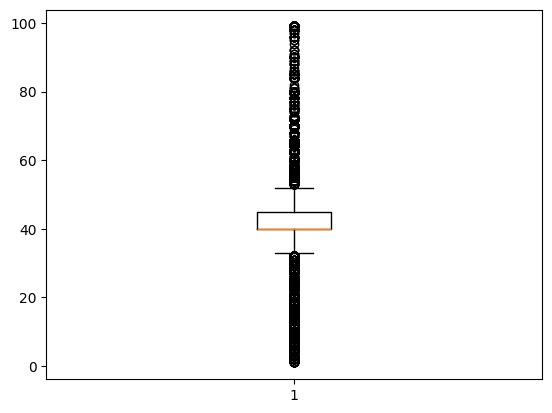

In [ ]:
plt.boxplot(df['hours-per-week'])
plt.show()

In [ ]:
# Keep only required columns
features = ['age', 'education', 'workclass', 'occupation', 'hours-per-week', 'gender']
X = df[features]
y = df['income']  # replace with correct target column
X

,age,education,workclass,occupation,hours-per-week,gender
0,25,11th,Private,Machine-op-inspct,40,Male
1,38,HS-grad,Private,Farming-fishing,50,Male
2,28,Assoc-acdm,Local-gov,Protective-serv,40,Male
3,44,Some-college,Private,Machine-op-inspct,40,Male
4,18,Some-college,Others,Others,30,Female
...,...,...,...,...,...,...
48837,27,Assoc-acdm,Private,Tech-support,38,Female
48838,40,HS-grad,Private,Machine-op-inspct,40,Male
48839,58,HS-grad,Private,Adm-clerical,40,Female
48840,22,HS-grad,Private,Adm-clerical,20,Male


In [ ]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
df['workclass']=encoder.fit_transform(df['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
df['marital-status']=encoder.fit_transform(df['marital-status'])   #3 categories 0, 1, 2
df['occupation']=encoder.fit_transform(df['occupation'])
df['relationship']=encoder.fit_transform(df['relationship'])      #5 categories  0, 1, 2, 3, 4
df['race']=encoder.fit_transform(df['race'])
df['gender']=encoder.fit_transform(df['gender'])    #2 catogories     0, 1
df['native-country']=encoder.fit_transform(df['native-country'])
df['education']=encoder.fit_transform(df['education'])#categories
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,4,89814,8,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,4,12,2,11,0,4,1,0,0,40,39,>50K
3,44,4,160323,11,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,3,103497,11,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,4,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,4,154374,8,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,4,151910,8,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,4,201490,8,9,4,0,3,4,1,0,0,20,39,<=50K


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns from the features variable
cat_cols = ['education', 'workclass', 'occupation', 'gender']
num_cols = ['age', 'hours-per-week']

# Create a ColumnTransformer to apply one-hot encoding to categorical columns and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols) # Apply StandardScaler here
    ],
    remainder='passthrough' # Keep other columns (if any) as is
)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor), # Add the preprocessor to the pipeline
        ('classifier', model) # Use 'classifier' as the step name for the model
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8102
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7078
        >50K       0.67      0.43      0.53      2272

    accuracy                           0.81      9350
   macro avg       0.75      0.68      0.70      9350
weighted avg       0.80      0.81      0.80      9350

RandomForest Accuracy: 0.7822
              precision    recall  f1-score   support

       <=50K       0.84      0.88      0.86      7078
        >50K       0.56      0.46      0.51      2272

    accuracy                           0.78      9350
   macro avg       0.70      0.67      0.68      9350
weighted avg       0.77      0.78      0.77      9350

KNN Accuracy: 0.7863
              precision    recall  f1-score   support

       <=50K       0.84      0.89      0.86      7078
        >50K       0.57      0.47      0.52      2272

    accuracy                           0.79      9350
   macro avg       0.71      0.68      0.

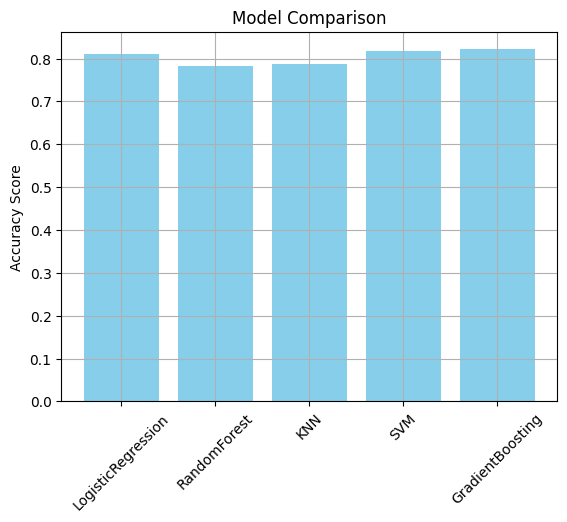

In [ ]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:


# Define categorical and numerical columns
cat_cols = ['education', 'workclass', 'occupation', 'gender']
num_cols = ['age', 'hours-per-week']

# Column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Train model
pipeline.fit(X, y)

# Save the entire pipeline
joblib.dump(pipeline, 'best_model.pkl')


['best_model.pkl']

In [ ]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the full pipeline (preprocessing + model)
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")
st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs
st.sidebar.header("Input Employee Details")
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
workclass = st.sidebar.selectbox("Work Class", [
    "Private", "Self-emp-not-inc", "Local-gov", "State-gov", "Federal-gov",
    "Without-pay", "Never-worked"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
gender = st.sidebar.radio("Gender", ["Male", "Female"])
input_df = pd.DataFrame([{
    'age': age,
    'education': education,
    'workclass': workclass,
    'occupation': occupation,
    'hours-per-week': hours_per_week,
    'gender': gender,
}])

st.write("### 🔎 Input Data")
st.write(input_df)

if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())

    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())

    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')


Writing app.py


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.59.189:8501

  Stopping...
  Stopping...


In [ ]:
!ngrok authtoken 307hUv6MQgDMNWwZefQGjfPH7by_89vu5rS36E7zaubDkECAU

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import threading

def run_streamlit():
  os.system('streamlit run app.py --server.port 8501')


thread = threading.Thread(target=run_streamlit)
thread.start()

In [ ]:
from pyngrok import ngrok
import time
time.sleep(5)
# Expose port 8501
public_url = ngrok.connect(8501)
print("Your Streamlit app is running at:", public_url)

Your Streamlit app is running at: NgrokTunnel: "https://e6083bb125c4.ngrok-free.app" -> "http://localhost:8501"
